# Malaria Classification using CNN

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import PIL
import matplotlib.pyplot as plt
from matplotlib.image import imread

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import pathlib
cwd = os.getcwd()
# print(cwd)
# print(os.listdir(cwd))
# path = "/cell_images"
path = os.path.join(cwd, "cell_images/cell_images")
items = os.listdir(path)
print(items)
data_dir = pathlib.Path(path).with_suffix('')

['.DS_Store', 'Parasitized', 'Uninfected']


In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

27558


In [5]:
uninfected = list(data_dir.glob("Uninfected/*"))
parasitized = list(data_dir.glob("Parasitized/*"))
print("Number of uninfected cells", len(uninfected))
print("Number of infected cells", len(parasitized))

Number of uninfected cells 13780
Number of infected cells 13780


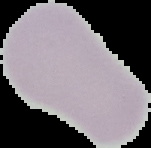

In [6]:
PIL.Image.open(uninfected[1])

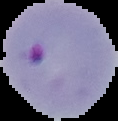

In [7]:
PIL.Image.open(parasitized[1])

In [8]:
from PIL import Image

def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size

def check_image_dimensions(directory):
    # List all files in the directory
    files = os.listdir(directory)
    
    # Filter out only image files
    image_files = [file for file in files if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]
    
    # Iterate through each image file and print its dimensions
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        dimensions = get_image_dimensions(image_path)
        print(f"Image: {image_file}, Dimensions: {dimensions}")

In [9]:
data_dir

PosixPath('/Users/raghavagarwal/Downloads/BTP/ml_model/cell_images/cell_images')

In [10]:
path

'/Users/raghavagarwal/Downloads/BTP/ml_model/cell_images/cell_images'

In [11]:
Uninfected_path = f'{path}/Uninfected/'
Infected_path = f'{path}/Parasitized/'

In [12]:
dim1 = []
dim2 = []
for image_filename in os.listdir(Uninfected_path):
    
    if not image_filename.endswith(('jpg', 'jpeg', 'png', 'gif')):
                         continue
                      
    img = imread(Uninfected_path+image_filename)
    
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

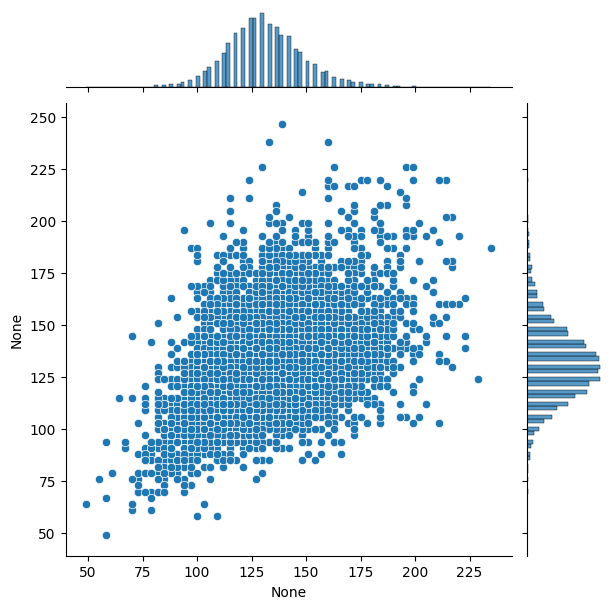

In [13]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")
plt.show()

In [14]:
# mean of dimension of uninfected images
np.mean(dim1), np.mean(dim2)


(131.58001306335728, 131.3424776834313)

In [15]:
dim1 = []
dim2 = []
for image_filename in os.listdir(Infected_path):
    
    if not image_filename.endswith(('jpg', 'jpeg', 'png', 'gif')):
                         continue
                      
    img = imread(Infected_path+image_filename)
    
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

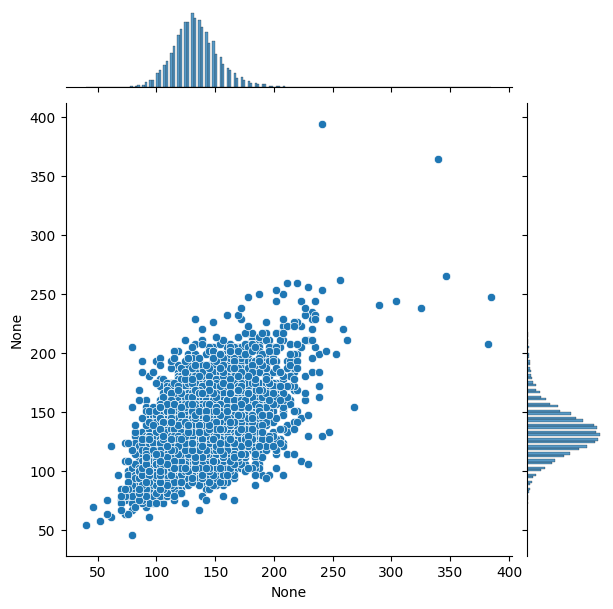

In [16]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")
plt.show()

In [17]:
# mean of dimension of Infected images
np.mean(dim1), np.mean(dim2)

(134.3868930981929, 133.6318310472458)

In [18]:
# image size of both set of images is around 130 x 130
image_shape = (130,130,3)

In [19]:
from PIL import Image

image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # randomly shift the pic width by a max of 5%
                               height_shift_range=0.10, # randonly shift the pic height by a max of 5%
                               # rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                               validation_split = 0.3,
                              )

### Testing ImageDataGenerator

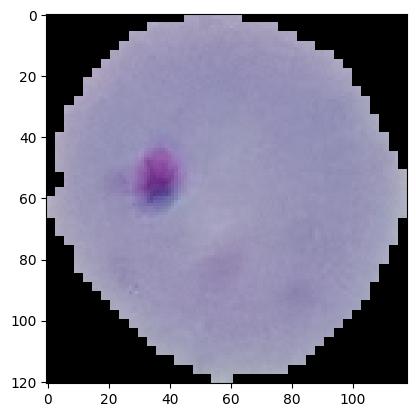

In [20]:
para_img = imread(parasitized[1])
plt.imshow(para_img)

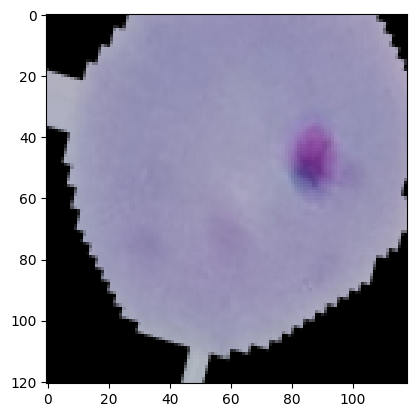

In [21]:
plt.imshow(image_gen.random_transform(para_img))

## Generating Manipulated Images from a Directory

In [22]:
batch_size = 16

In [23]:
training_data = image_gen.flow_from_directory(
    data_dir,
    subset = "training",
    class_mode="binary",
    target_size = image_shape[:2],
    batch_size = batch_size
)

validation_data = image_gen.flow_from_directory(
    data_dir,
    subset = "validation",
    class_mode="binary",
    target_size = image_shape[:2],
    batch_size = batch_size,
    shuffle=False
)

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [24]:
training_data.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [25]:
validation_data.class_indices

{'Parasitized': 0, 'Uninfected': 1}

## Creating the Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/raghavagarwal/Downloads/BTP/ml_model/btp_env_3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

## Training the Model

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
history = model.fit(training_data, epochs=12, validation_data=validation_data)

Epoch 1/12
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 179s 148ms/step - accuracy: 0.5887 - loss: 0.6744 - val_accuracy: 0.6321 - val_loss: 0.6545
Epoch 2/12
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 164s 136ms/step - accuracy: 0.6352 - loss: 0.6237 - val_accuracy: 0.9308 - val_loss: 0.1985
Epoch 3/12
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 164s 136ms/step - accuracy: 0.9383 - loss: 0.2040 - val_accuracy: 0.9411 - val_loss: 0.1854
Epoch 4/12
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 171s 142ms/step - accuracy: 0.9410 - loss: 0.1922 - val_accuracy: 0.9398 - val_loss: 0.2100
Epoch 5/12
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 171s 142ms/step - accuracy: 0.9447 - loss: 0.1808 - val_accuracy: 0.9291 - val_loss: 0.1982
Epoch 6/12
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 175s 145ms/step - accuracy: 0.9452 - loss: 0.1785 - val_accuracy: 0.9347 - val_loss: 0.1873
Epoch 7/12
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 169s 140ms/step - accuracy: 0.9469 - loss: 0.1690 - val_accuracy: 0.9503 - val_loss: 0.1590
Epoch 8/12
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 174s 144ms/step - ac

## Evaluating the Model

In [40]:
losses = pd.DataFrame(model.history.history)

In [4]:
losses[['loss','val_loss']].plot()

NameError: name 'losses' is not defined

In [3]:
model.evaluate(validation_data)

NameError: name 'validation_data' is not defined

In [45]:
pred_probabilities = model.predict(validation_data).flatten()

517/517 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step


In [46]:
predictions = (pred_probabilities > 0.5).astype(np.int32)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(validation_data.classes,predictions)

array([[3898,  235],
       [ 220, 3913]])

In [49]:
print(classification_report(validation_data.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4133
           1       0.94      0.95      0.95      4133

    accuracy                           0.94      8266
   macro avg       0.94      0.94      0.94      8266
weighted avg       0.94      0.94      0.94      8266



In [50]:
model.save("malaria_cnn_model_2.h5")

In [51]:
import keras.saving

keras.saving.save_model(model, 'malaria_cnn_model_4.keras')

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('malaria_cnn_model_4.keras')

def predict_image(image_path, model, image_shape=(130, 130, 3)):  # Set default image shape
    from tensorflow.keras.preprocessing import image
    # Load the image and resize it to the target size
    img = image.load_img(image_path, target_size=image_shape[:2])
    # Convert the image to an array
    img_array = image.img_to_array(img)   
    # Reshape the array (since we're only predicting for 1 image, we need an extra dimension)
    img_array = np.expand_dims(img_array, axis=0)
    # img_array = img_array / 255.0  # Use the same normalization as in training
    prediction = model.predict(img_array)
    
    # Convert the prediction to binary output
    print(prediction)
    if prediction > 0.5:
        return "Uninfected"
    else:
        return "Parasitized"

# Example usage:
image_path = "cell_1_infected.png"  # Replace with the actual file path of the image you want to test
result = predict_image(image_path, model)
print(f"The prediction for the image is: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[0.00586802]]
The prediction for the image is: Parasitized
